In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [13]:
df = pd.read_csv('/content/drive/MyDrive/와빅_교육세션/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()
df = df.dropna()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0

In [15]:
df['Pclass'] = df['Pclass'].apply(lambda x : str(x) + ' class')
df['Age'] = df['Age'].apply(lambda x: 'under age 20' if x < 30 else 'age 30s' if x < 40 else 'age 40s' if x < 50 else 'age 50s' if x < 60 else 'over age 60')
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [16]:
df['Pclass'].value_counts()

1 class    158
2 class     15
3 class     10
Name: Pclass, dtype: int64

In [17]:
df['Age'].value_counts()

under age 20    65
age 30s         49
age 40s         33
age 50s         24
over age 60     12
Name: Age, dtype: int64

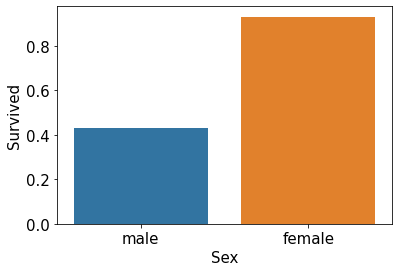

In [18]:
sns.barplot(x='Sex',y='Survived',data=df, order =['male','female'], ci = False)

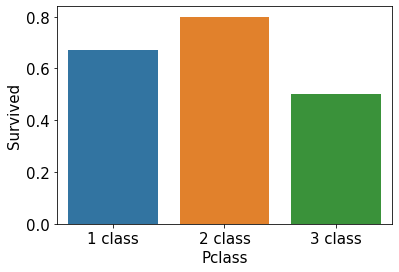

In [24]:
sns.barplot(x='Pclass',y='Survived', data=df, order = ['1 class', '2 class', '3 class'], ci = False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

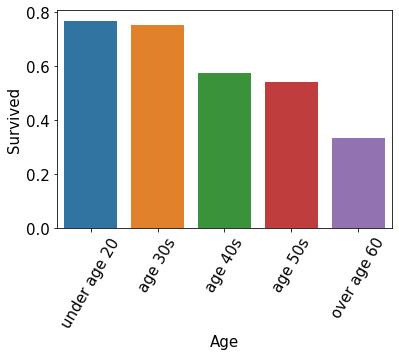

In [25]:
sns.barplot(x='Age',y='Survived', data=df, order = ['under age 20','age 30s', 'age 40s', 'age 50s', 'over age 60'], ci = False)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

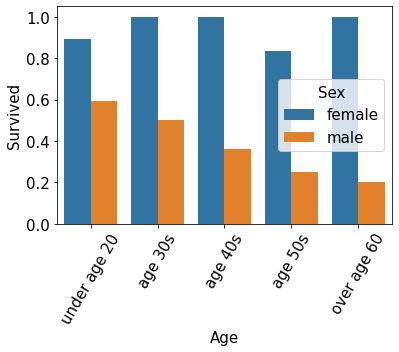

In [34]:
sns.barplot(x='Age',y='Survived', hue='Sex', data=df, order = ['under age 20','age 30s', 'age 40s', 'age 50s', 'over age 60'], ci = False)
plt.xticks(rotation=60)

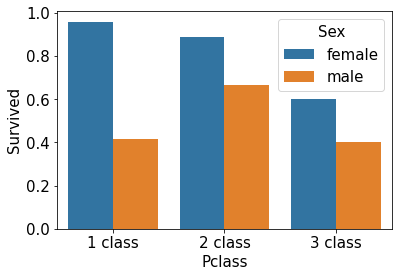

In [36]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=df, order = ['1 class','2 class', '3 class'], ci = False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

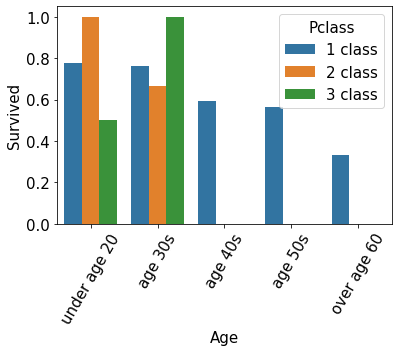

In [38]:
sns.barplot(x='Age',y='Survived', hue='Pclass', data=df, order=['under age 20','age 30s', 'age 40s', 'age 50s', 'over age 60'], hue_order=['1 class','2 class', '3 class'], ci = False)
plt.xticks(rotation=60)